# Imports

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [3]:
# set seeds for reproducable results
random.seed(1234)
tf.random.set_seed(1234)

# Data

In [4]:
X = np.load('data/X.npy')
y = np.load('data/y.npy')

In [5]:
print(f'X has a shape of {X.shape}')
print(f'y has a shape of {y.shape}')

X has a shape of (5000, 400)
y has a shape of (5000, 1)


Training set contains 5000 examples, where each input is a 1D array of 400 floating point numbers. <br>Each array contains 400 pixels. <br>These pixels can be rearranged into a 20 by 20 grid.

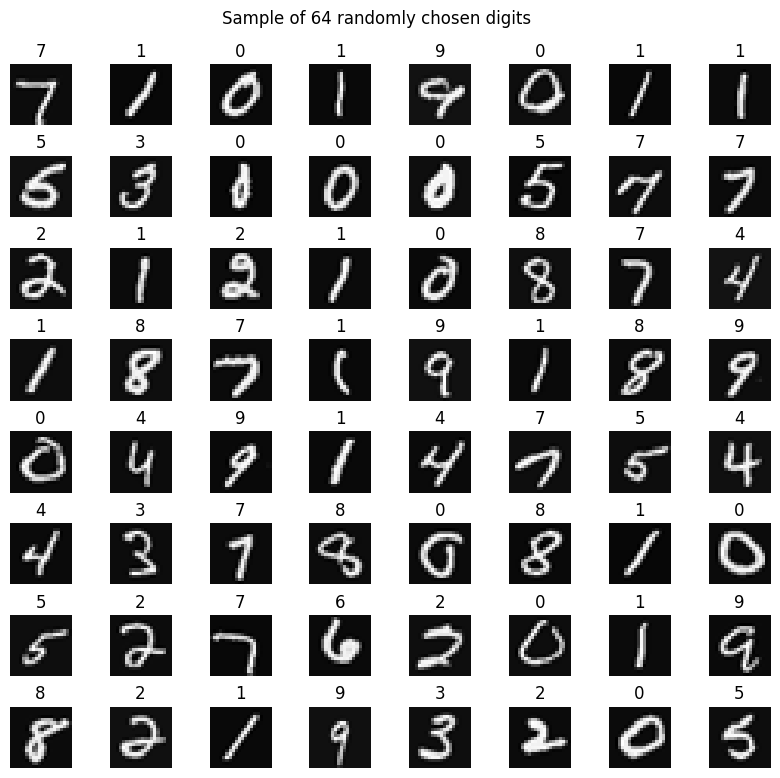

In [6]:
m,n = X.shape
fig, axes = plt.subplots(8,8,figsize=(8,8))
fig.tight_layout(pad = 0.1, rect = (0,0,1,0.92))
fig.suptitle('Sample of 64 randomly chosen digits')

for ax in axes.flat:
    index = random.randint(0,m-1)
    ax.imshow(X[index].reshape(20,20).T, cmap = 'gray')
    ax.set_title(f'{y[index][0]}')
    ax.set_axis_off()

plt.show()

# Model

In [36]:
model = Sequential(
    [
        Input(shape=(400,)),
        Dense(25, activation ='relu'),
        Dense(15, activation = 'relu'),
        Dense(10, activation = 'linear')
    ]
)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 25)                  │          10,025 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 15)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,575 (41.31 KB)

 Trainable params: 10,575 (41.31 KB)

 Non-trainable params: 0 (0.00 B)

## Before Training

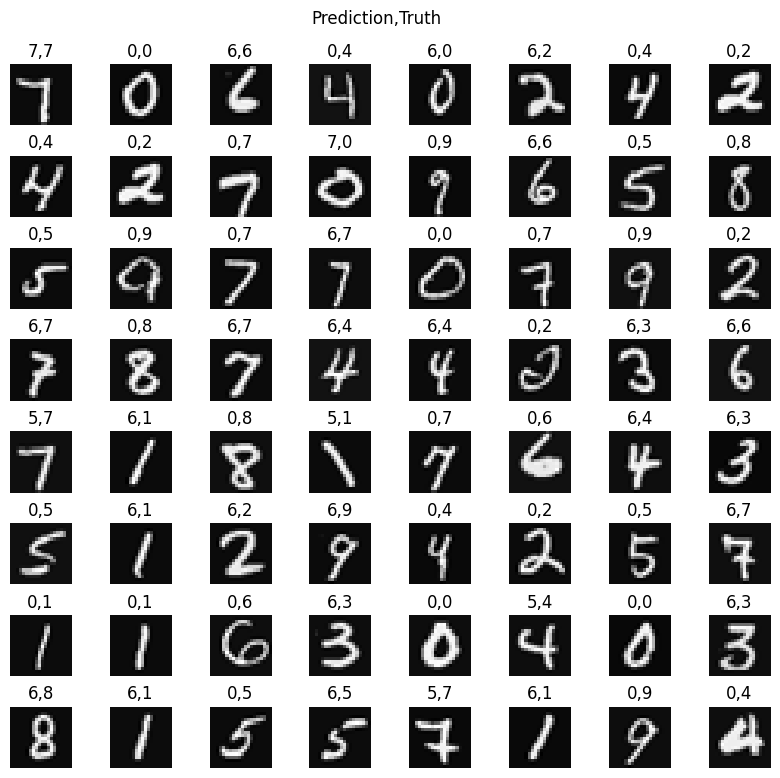

In [37]:
fig, axes = plt.subplots(8,8,figsize=(8,8))
fig.tight_layout(pad = 0.1, rect = (0,0,1,0.92))
fig.suptitle('Prediction,Truth')
truth_list = []

for ax in axes.flat:
    index = random.randint(0,m-1)
    prediction = np.argmax(model.predict(X[index].reshape(1,n),verbose=0))
    truth_list.append(prediction == y[index][0])
    ax.imshow(X[index].reshape(20,20).T, cmap = 'gray')
    ax.set_title(f'{prediction},{y[index][0]}')
    ax.set_axis_off()

plt.show()

In [38]:
print(f'{sum(truth_list)} out of {len(axes.flat)} digits correctly predicted')

8 out of 64 digits correctly predicted


## Train

In [39]:
# define loss function
model.compile(
    loss = SparseCategoricalCrossentropy(from_logits = True),
    optimizer = Adam(0.001)
)

# train model
num_epochs = 20
history = model.fit(X,y,epochs = num_epochs)

Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.9394
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7020
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4234
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3376
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2888
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2555
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2296
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2089
Epoch 9/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1913
Epoch 10/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1763
Epoch 11/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1634
Epoch 12/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1514
Epoch 13/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1414
Epoch 14/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1318
Epoch 15/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - lo

We can monitor how well our model fits the training data by drawing a cost function.

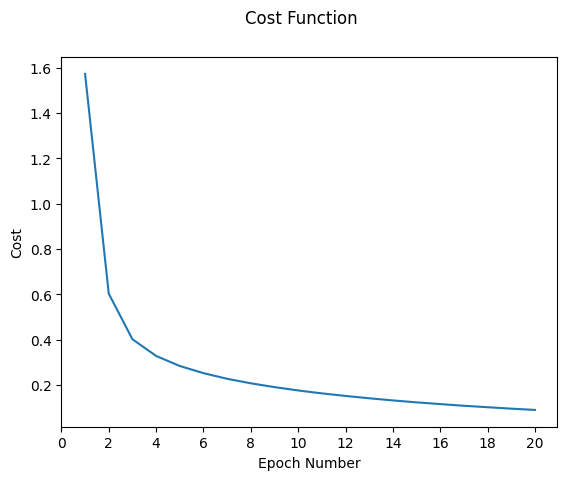

In [40]:
# plot cost function
plt.plot(history.epoch+np.ones(num_epochs),history.history['loss'])
plt.suptitle('Cost Function')
plt.ylabel('Cost')
plt.xlabel('Epoch Number')
tick_positions = range(0,num_epochs+1,2)
plt.xticks(tick_positions)
plt.show()

Cost is a metric for how poorly our model fits our training data. It is good to see it come down. Let's see how accurate its predictions are.

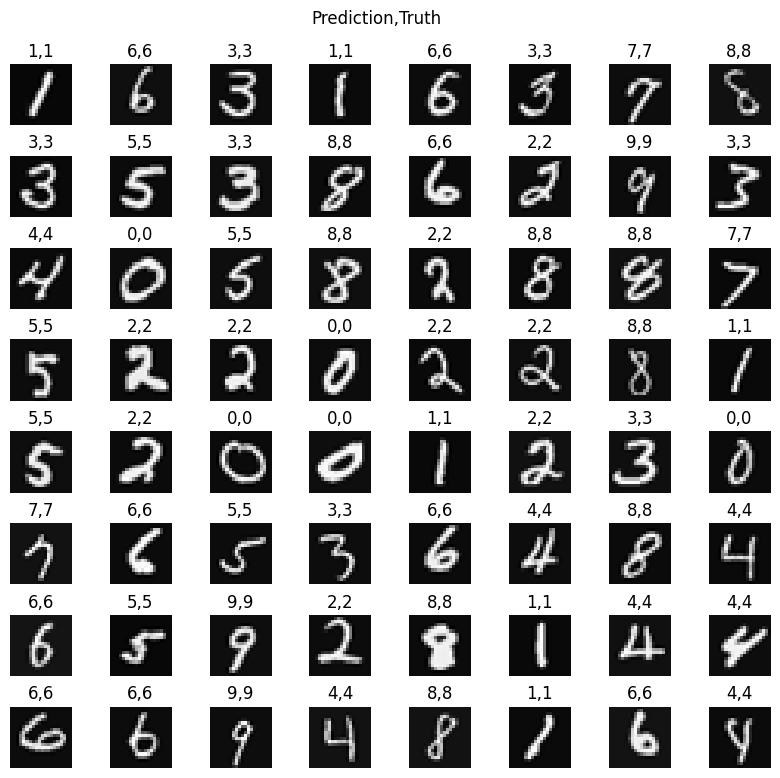

In [41]:
fig, axes = plt.subplots(8,8,figsize=(8,8))
fig.tight_layout(pad = 0.1, rect = (0,0,1,0.92))
fig.suptitle('Prediction,Truth')
truth_list = []

for ax in axes.flat:
    index = random.randint(0,m-1)
    prediction = np.argmax(model.predict(X[index].reshape(1,n), verbose=0))
    truth_list.append(prediction == y[index][0])
    ax.imshow(X[index].reshape(20,20).T, cmap = 'gray')
    ax.set_title(f'{prediction},{y[index][0]}')
    ax.set_axis_off()

plt.show()

In [42]:
print(f'{sum(truth_list)} out of {len(axes.flat)} digits correctly predicted')

64 out of 64 digits correctly predicted


# Appendix

We have not actually applied softmax activation directly to our neural network. This is not a problem because the predictions we get from it work in the same way.

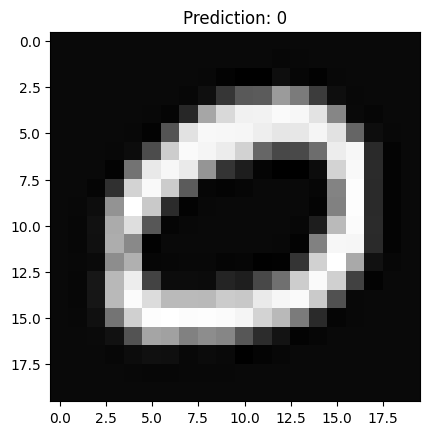

In [53]:
plt.imshow(X[347].reshape(20,20).T,cmap='gray')
plt.title(f'Prediction: {np.argmax(model.predict(X[347].reshape(1,400),verbose=0))}')
plt.show()

Let's break it down

In [55]:
prediction = model.predict(X[347].reshape(1,400),verbose=0)
prediction

array([[ 18.722462  ,   3.7298193 ,   1.4828175 ,  -8.138451  ,
         -2.3909843 ,   8.911759  ,   3.946938  , -12.095845  ,
         -0.49601543,  -3.1371217 ]], dtype=float32)

These are clearly not probabilities. Note that the element at index 0, representing the 0 digit, has the highest value. Now, let's apply the softmax function to this array.

In [71]:
prediction_p = tf.nn.softmax(prediction)
prediction_p

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[9.9994445e-01, 3.0814425e-07, 3.2575656e-08, 2.1598812e-12,
        6.7689787e-10, 5.4858254e-05, 3.8286643e-07, 4.1281523e-14,
        4.5029513e-09, 3.2098127e-10]], dtype=float32)>

Now these look a lot more like probabilities. Again, the element at the 0 index is the highest. What do you think probabilities should add up to?

In [72]:
sum(prediction_p.numpy().flat)

1.0000000358143015

Close enough